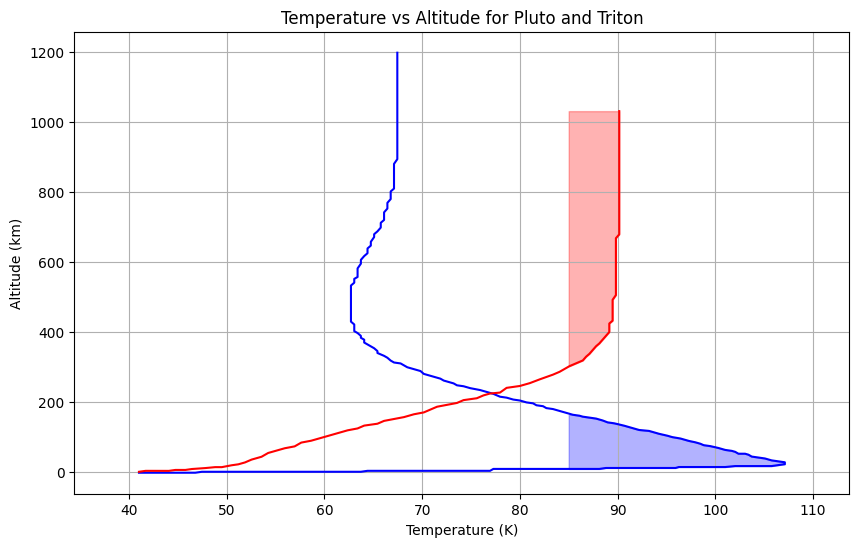

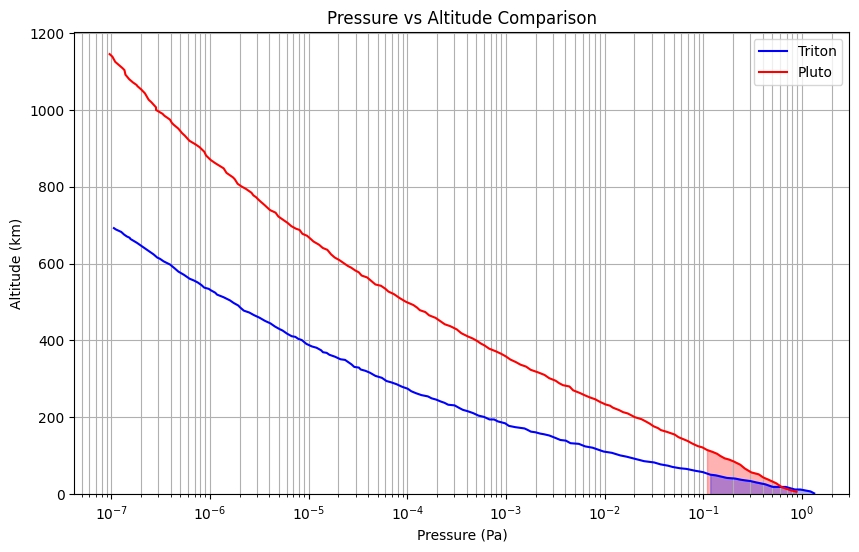

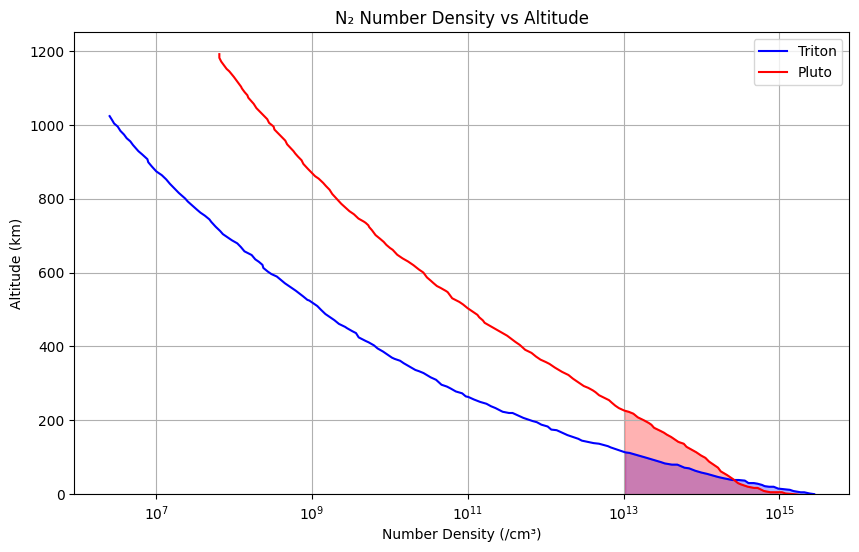

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 温度-高度グラフ用データ読み込み
pluto_data = pd.read_csv('pluto.csv')
triton_data = pd.read_csv('Triton.csv')

# 1つ目のグラフ：温度-高度
plt.figure(figsize=(10, 6))
plt.plot(pluto_data['40.33898305084746'], pluto_data[' -2.7149321266967945'], 'b-')
plt.plot(triton_data['40'], triton_data[' -2.708803611738176'], 'r-')

# 85K以上の領域を強調表示
pluto_temp = pluto_data['40.33898305084746']
pluto_alt = pluto_data[' -2.7149321266967945']
pluto_mask = (pluto_temp >= 85)
plt.fill_betweenx(pluto_alt, 85, pluto_temp.where(pluto_mask), alpha=0.3, color='blue')

triton_temp = triton_data['40']
triton_alt = triton_data[' -2.708803611738176']
triton_mask = (triton_temp >= 85)
plt.fill_betweenx(triton_alt, 85, triton_temp.where(triton_mask), alpha=0.3, color='red')

plt.xlabel('Temperature (K)')
plt.ylabel('Altitude (km)')
plt.title('Temperature vs Altitude for Pluto and Triton')
plt.grid(True)
plt.margins(x=0.1)
plt.show()

# 気圧-高度グラフ用データ読み込み
pluto_pressure = pd.read_csv('Pluto_Pressure.csv')
triton_pressure = pd.read_csv('Triton-Pressure.csv')

# 2つ目のグラフ：気圧-高度
plt.figure(figsize=(10, 6))
pluto_pressure_pa = pluto_pressure['10.270923274392413'] * 0.1
triton_pressure_pa = triton_pressure['14.205996037960368'] * 0.1

plt.semilogx(triton_pressure_pa, triton_pressure[' 2.0114225355966937'], 'b-', label='Triton')
plt.semilogx(pluto_pressure_pa, pluto_pressure[' 1.4687167233723812'], 'r-', label='Pluto')

# 0.1-10 Paの範囲を強調表示
pressure_mask = (pluto_pressure_pa >= 1e-1) & (pluto_pressure_pa <= 1e1)
plt.fill_between(pluto_pressure_pa.where(pressure_mask), 
                 pluto_pressure[' 1.4687167233723812'].where(pressure_mask),
                 0, 
                 alpha=0.3, 
                 color='red')

pressure_mask = (triton_pressure_pa >= 1e-1) & (triton_pressure_pa <= 1e1)
plt.fill_between(triton_pressure_pa.where(pressure_mask),
                 triton_pressure[' 2.0114225355966937'].where(pressure_mask),
                 0,
                 alpha=0.3,
                 color='blue')

plt.xlabel('Pressure (Pa)')
plt.ylabel('Altitude (km)')
plt.title('Pressure vs Altitude Comparison')
plt.grid(True)
plt.grid(True, which="both", ls="-")
plt.legend()
plt.ylim(bottom=0)
plt.show()

# 数密度-高度グラフ用データ読み込み
triton_n2 = pd.read_csv('Triton_N2.csv')
pluto_n2 = pd.read_csv('Pluto_N2.csv')

# 3つ目のグラフ：数密度-高度
plt.figure(figsize=(10, 6))
plt.semilogx(triton_n2['3018455797376464.5'], triton_n2[' 0'], 'b-', label='Triton')
plt.semilogx(pluto_n2['1927028532714302.2'], pluto_n2[' -1.5410655686705468'], 'r-', label='Pluto')

# 数密度 1e13-1e14 /cm³の範囲を強調表示
n2_mask_triton = (triton_n2['3018455797376464.5'] >= 1e13) & (triton_n2['3018455797376464.5'] <= 1e16)
plt.fill_between(triton_n2['3018455797376464.5'].where(n2_mask_triton),
                 triton_n2[' 0'].where(n2_mask_triton),
                 0,
                 alpha=0.3,
                 color='blue')

n2_mask_pluto = (pluto_n2['1927028532714302.2'] >= 1e13) & (pluto_n2['1927028532714302.2'] <= 1e16)
plt.fill_between(pluto_n2['1927028532714302.2'].where(n2_mask_pluto),
                 pluto_n2[' -1.5410655686705468'].where(n2_mask_pluto),
                 0,
                 alpha=0.3,
                 color='red')

plt.xlabel('Number Density (/cm³)')
plt.ylabel('Altitude (km)')
plt.title('N₂ Number Density vs Altitude')
plt.grid(True)
plt.grid(True, which="both", ls="-")
plt.legend()
plt.ylim(bottom=0)
plt.show()


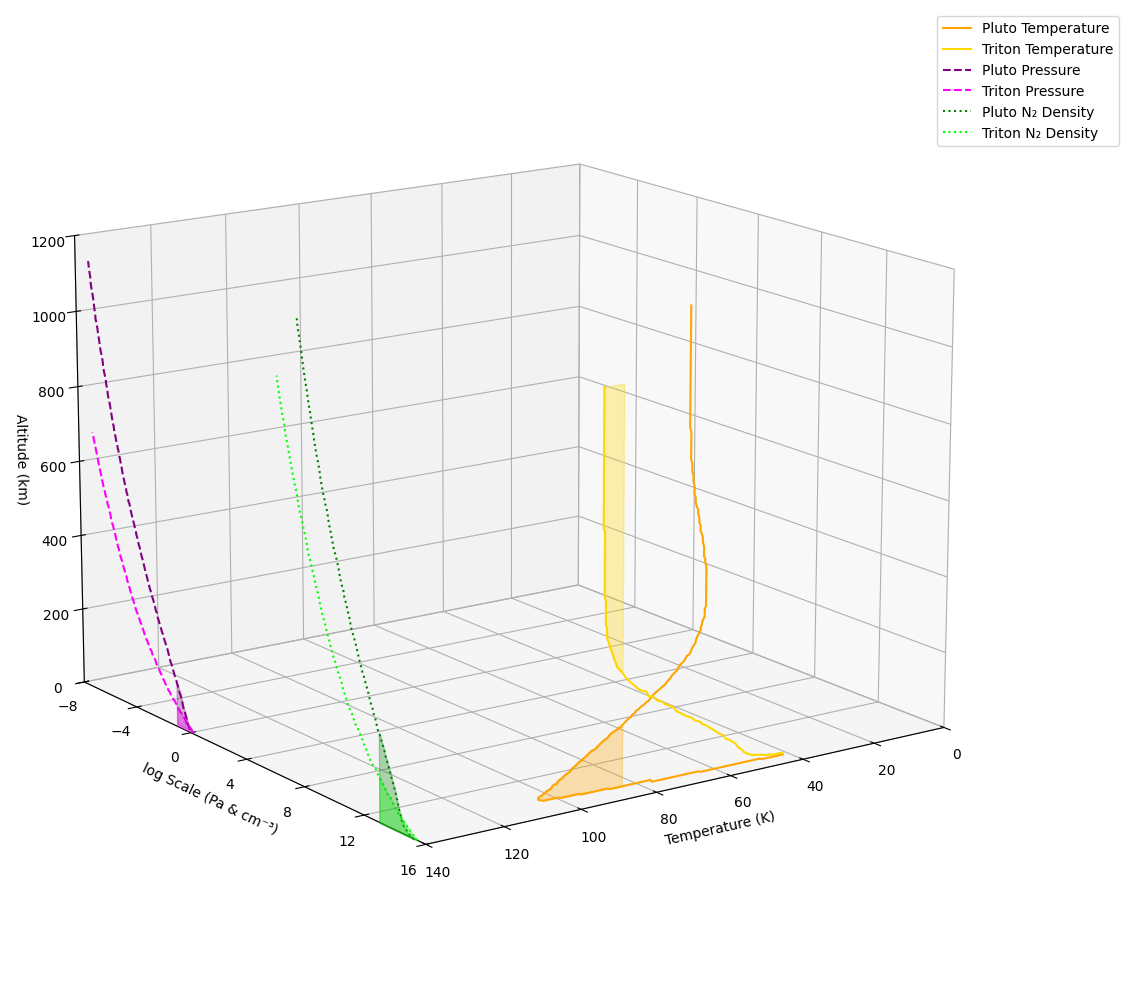

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np

# データ読み込み
pluto_data = pd.read_csv('pluto.csv')
triton_data = pd.read_csv('Triton.csv')
pluto_pressure = pd.read_csv('Pluto_Pressure.csv')
triton_pressure = pd.read_csv('Triton-Pressure.csv')
triton_n2 = pd.read_csv('Triton_N2.csv')
pluto_n2 = pd.read_csv('Pluto_N2.csv')

# 3Dプロット作成
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

# カラー設定
pluto_pressure_color = 'purple'
triton_pressure_color = 'magenta'
pluto_temp_color = 'orange' 
triton_temp_color = 'gold'
pluto_density_color = 'green'
triton_density_color = 'lime'

# Temperature fill for Pluto
pluto_temp = pluto_data['40.33898305084746'].values
pluto_alt = pluto_data[' -2.7149321266967945'].values
pluto_mask = (pluto_temp >= 85)

temp_x = pluto_temp[pluto_mask]
temp_z = pluto_alt[pluto_mask]
temp_y = np.ones_like(temp_x) * 15  # Changed to 15

vertices = np.array([[x, y, z] for x, y, z in zip(temp_x, temp_y, temp_z)])
vertices = np.vstack((vertices, [[85, 15, temp_z[-1]], [85, 15, temp_z[0]]])) # Changed y to 15
poly = Poly3DCollection([vertices], alpha=0.3, color=pluto_temp_color)
ax.add_collection3d(poly)

# Temperature fill for Triton
triton_temp = triton_data['40'].values
triton_alt = triton_data[' -2.708803611738176'].values
triton_mask = (triton_temp >= 85)

temp_x = triton_temp[triton_mask]
temp_z = triton_alt[triton_mask]
temp_y = np.ones_like(temp_x) * 15  # Changed to 15

vertices = np.array([[x, y, z] for x, y, z in zip(temp_x, temp_y, temp_z)])
vertices = np.vstack((vertices, [[85, 15, temp_z[-1]], [85, 15, temp_z[0]]])) # Changed y to 15
poly = Poly3DCollection([vertices], alpha=0.3, color=triton_temp_color)
ax.add_collection3d(poly)

# Pressure fill for Pluto
pluto_pressure_pa = pluto_pressure['10.270923274392413'].values * 0.1
pluto_alt_p = pluto_pressure[' 1.4687167233723812'].values
pressure_mask = (pluto_pressure_pa >= 1e-1) & (pluto_pressure_pa <= 1e1)

press_y = np.log10(pluto_pressure_pa[pressure_mask])
press_z = pluto_alt_p[pressure_mask]
press_x = np.ones_like(press_y) * 140  # Changed to 140

vertices = np.array([[x, y, z] for x, y, z in zip(press_x, press_y, press_z)])
vertices = np.vstack((vertices, [[140, np.log10(1e-1), press_z[-1]], [140, np.log10(1e-1), press_z[0]]]))
poly = Poly3DCollection([vertices], alpha=0.3, color=pluto_pressure_color)
ax.add_collection3d(poly)

# Pressure fill for Triton
triton_pressure_pa = triton_pressure['14.205996037960368'].values * 0.1
triton_alt_p = triton_pressure[' 2.0114225355966937'].values
pressure_mask = (triton_pressure_pa >= 1e-1) & (triton_pressure_pa <= 1e1)

press_y = np.log10(triton_pressure_pa[pressure_mask])
press_z = triton_alt_p[pressure_mask]
press_x = np.ones_like(press_y) * 140  # Changed to 140

vertices = np.array([[x, y, z] for x, y, z in zip(press_x, press_y, press_z)])
vertices = np.vstack((vertices, [[140, np.log10(1e-1), press_z[-1]], [140, np.log10(1e-1), press_z[0]]]))
poly = Poly3DCollection([vertices], alpha=0.3, color=triton_pressure_color)
ax.add_collection3d(poly)

# Number Density fill for Pluto
n2_mask_pluto = (pluto_n2['1927028532714302.2'] >= 1e13) & (pluto_n2['1927028532714302.2'] <= 1e16)
vertices = np.array([[140, np.log10(x), z] for x, z in zip(pluto_n2['1927028532714302.2'][n2_mask_pluto], 
                    pluto_n2[' -1.5410655686705468'][n2_mask_pluto])])
vertices = np.vstack((vertices, [[140, np.log10(1e13), vertices[-1,2]], [140, np.log10(1e13), vertices[0,2]]]))
poly = Poly3DCollection([vertices], alpha=0.3, color=pluto_density_color)
ax.add_collection3d(poly)

# Number Density fill for Triton
n2_mask_triton = (triton_n2['3018455797376464.5'] >= 1e13) & (triton_n2['3018455797376464.5'] <= 1e16)
vertices = np.array([[140, np.log10(x), z] for x, z in zip(triton_n2['3018455797376464.5'][n2_mask_triton], 
                    triton_n2[' 0'][n2_mask_triton])])
vertices = np.vstack((vertices, [[140, np.log10(1e13), vertices[-1,2]], [140, np.log10(1e13), vertices[0,2]]]))
poly = Poly3DCollection([vertices], alpha=0.3, color=triton_density_color)
ax.add_collection3d(poly)

# Main line plots
ax.plot(pluto_temp, np.ones_like(pluto_temp) * 15, pluto_alt, 
        '-', color=pluto_temp_color, label='Pluto Temperature')
ax.plot(triton_temp, np.ones_like(triton_temp) * 15, triton_alt, 
        '-', color=triton_temp_color, label='Triton Temperature')

ax.plot(np.ones_like(pluto_pressure_pa) * 140, np.log10(pluto_pressure_pa), pluto_alt_p, 
        '--', color=pluto_pressure_color, label='Pluto Pressure')
ax.plot(np.ones_like(triton_pressure_pa) * 140, np.log10(triton_pressure_pa), triton_alt_p, 
        '--', color=triton_pressure_color, label='Triton Pressure')

ax.plot(np.ones_like(pluto_n2['1927028532714302.2']) * 140, 
        np.log10(pluto_n2['1927028532714302.2']), 
        pluto_n2[' -1.5410655686705468'], 
        ':', color=pluto_density_color, label='Pluto N₂ Density')
ax.plot(np.ones_like(triton_n2['3018455797376464.5']) * 140, 
        np.log10(triton_n2['3018455797376464.5']), 
        triton_n2[' 0'], 
        ':', color=triton_density_color, label='Triton N₂ Density')

# グラフ設定
ax.set_xlabel('Temperature (K)')
ax.set_ylabel('log Scale (Pa & cm⁻³)')
ax.set_zlabel('Altitude (km)')
ax.legend(bbox_to_anchor=(1.15, 1), loc='upper right')
ax.view_init(elev=15, azim=55)

# 軸の範囲設定
ax.set_ylim(-8, 16)
ax.set_yticks([-8, -4, 0, 4, 8, 12, 16])
ax.set_zlim(0, 1200)
ax.set_xlim(0, 140)

plt.tight_layout()
plt.show()





C:\Users\daiki\AppData\Local\Temp\ipykernel_10380\1645287048.py:158: RuntimeWarning: divide by zero encountered in log10
  np.log10(pluto_column_density),
C:\Users\daiki\AppData\Local\Temp\ipykernel_10380\1645287048.py:162: RuntimeWarning: divide by zero encountered in log10
  np.log10(triton_column_density),
c:\Users\daiki\AppData\Local\Programs\Python\Python312\Lib\site-packages\mpl_toolkits\mplot3d\proj3d.py:177: RuntimeWarning: invalid value encountered in divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


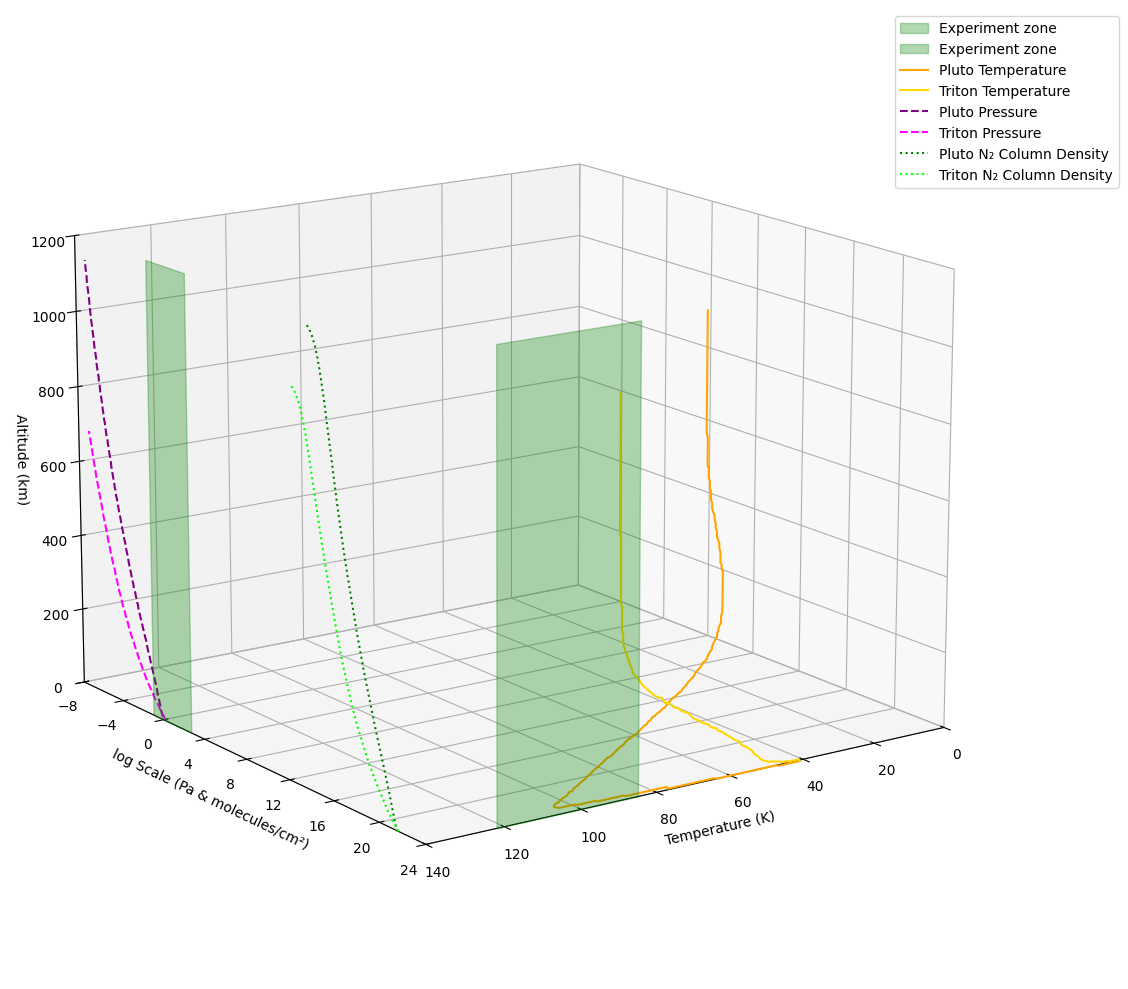

Total Pluto Column Density: 4.57e+22 molecules/cm²
Total Triton Column Density: 3.76e+22 molecules/cm²
Pluto O atoms: 5.76e+19 atoms/cm²
Triton O atoms: 4.73e+19 atoms/cm²


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np

# データ読み込み
pluto_data = pd.read_csv('pluto.csv')
triton_data = pd.read_csv('Triton.csv')
pluto_pressure = pd.read_csv('Pluto_Pressure.csv')
triton_pressure = pd.read_csv('Triton-Pressure.csv')
triton_n2 = pd.read_csv('Triton_N2.csv')
pluto_n2 = pd.read_csv('Pluto_N2.csv')

# 3Dプロット作成
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

# カラー設定
pluto_pressure_color = 'purple'
triton_pressure_color = 'magenta'
pluto_temp_color = 'orange' 
triton_temp_color = 'gold'
pluto_density_color = 'green'
triton_density_color = 'lime'



# Plutoの柱密度計算
pluto_density = pluto_n2['1927028532714302.2'].values
pluto_altitude = pluto_n2[' -1.5410655686705468'].values
pluto_column_density = np.zeros_like(pluto_density)

# 各高度での柱密度を計算（高度の高い方から積分）
for i in range(len(pluto_density)):
    # km -> cm の変換係数 1e5 を掛けて積分
    pluto_column_density[i] = np.trapz(pluto_density[i:], pluto_altitude[i:]) * 1e5

# Tritonの柱密度計算
triton_density = triton_n2['3018455797376464.5'].values
triton_altitude = triton_n2[' 0'].values
triton_column_density = np.zeros_like(triton_density)

for i in range(len(triton_density)):
    triton_column_density[i] = np.trapz(triton_density[i:], triton_altitude[i:]) * 1e5
 


# 温度実験領域の頂点を定義
exp_vertices = np.array([
    [85, 24, 1200],
    [122, 24, 1200],
    [122, 24, 0.1],
    [85, 24, 0.1]
])

# 温度実験領域のポリゴンを作成してプロットに追加
exp_poly = Poly3DCollection([exp_vertices], alpha=0.3, color='green', label='Experiment zone')
ax.add_collection3d(exp_poly)

# 圧力実験領域の頂点を定義
pressure_vertices = np.array([
    [140, np.log10(5e2), 1200],
    [140, np.log10(1e-1), 1200],
    [140, np.log10(1e-1), 0.1],
    [140, np.log10(5e2), 0.1]
])

# 圧力実験領域のポリゴンを作成してプロットに追加
pressure_poly = Poly3DCollection([pressure_vertices], alpha=0.3, color='green', label='Experiment zone')
ax.add_collection3d(pressure_poly)



# メインラインのプロット
# 温度プロット
ax.plot(pluto_temp, np.ones_like(pluto_temp) * 24, pluto_alt, 
        '-', color=pluto_temp_color, label='Pluto Temperature')
ax.plot(triton_temp, np.ones_like(triton_temp) * 24, triton_alt, 
        '-', color=triton_temp_color, label='Triton Temperature')

# 圧力プロット
ax.plot(np.ones_like(pluto_pressure_pa) * 140, np.log10(pluto_pressure_pa), pluto_alt_p, 
        '--', color=pluto_pressure_color, label='Pluto Pressure')
ax.plot(np.ones_like(triton_pressure_pa) * 140, np.log10(triton_pressure_pa), triton_alt_p, 
        '--', color=triton_pressure_color, label='Triton Pressure')

# 柱密度プロット
ax.plot(np.ones_like(pluto_column_density) * 140, 
        np.log10(pluto_column_density), 
        pluto_altitude, 
        ':', color=pluto_density_color, label='Pluto N₂ Column Density')
ax.plot(np.ones_like(triton_column_density) * 140, 
        np.log10(triton_column_density), 
        triton_altitude, 
        ':', color=triton_density_color, label='Triton N₂ Column Density')

# グラフ設定
ax.set_xlabel('Temperature (K)')
ax.set_ylabel('log Scale (Pa & molecules/cm²)')  # 単位を柱密度用に変更
ax.set_zlabel('Altitude (km)')
ax.legend(bbox_to_anchor=(1.15, 1), loc='upper right')
ax.view_init(elev=15, azim=55)

# 軸の範囲設定
ax.set_ylim(-8, 16)
ax.set_yticks([-8, -4, 0, 4, 8, 12, 16, 20, 24])
ax.set_zlim(0, 1200)
ax.set_xlim(0, 140)

plt.tight_layout()
plt.show()





# 冥王星の全柱密度計算
total_pluto_column_density = np.sum(pluto_column_density)
print(f"Total Pluto Column Density: {total_pluto_column_density:.2e} molecules/cm²")

# トリトンの全柱密度計算  
total_triton_column_density = np.sum(triton_column_density)
print(f"Total Triton Column Density: {total_triton_column_density:.2e} molecules/cm²")


# 全柱密度計算
total_pluto_column_density = np.sum(pluto_column_density)
total_triton_column_density = np.sum(triton_column_density)

# 酸素原子量計算 (0.126%)
o_pluto = total_pluto_column_density * 0.00126
o_triton = total_triton_column_density * 0.00126


print(f"Pluto O atoms: {o_pluto:.2e} atoms/cm²")
print(f"Triton O atoms: {o_triton:.2e} atoms/cm²")



C:\Users\daiki\AppData\Local\Temp\ipykernel_21604\2368082036.py:83: RuntimeWarning: divide by zero encountered in log10
  ax.plot(np.ones_like(pluto_column_density) * 140, np.log10(pluto_column_density), pluto_altitude,
C:\Users\daiki\AppData\Local\Temp\ipykernel_21604\2368082036.py:85: RuntimeWarning: divide by zero encountered in log10
  ax.plot(np.ones_like(triton_column_density) * 140, np.log10(triton_column_density), triton_altitude,
c:\Users\daiki\AppData\Local\Programs\Python\Python312\Lib\site-packages\mpl_toolkits\mplot3d\proj3d.py:177: RuntimeWarning: invalid value encountered in divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


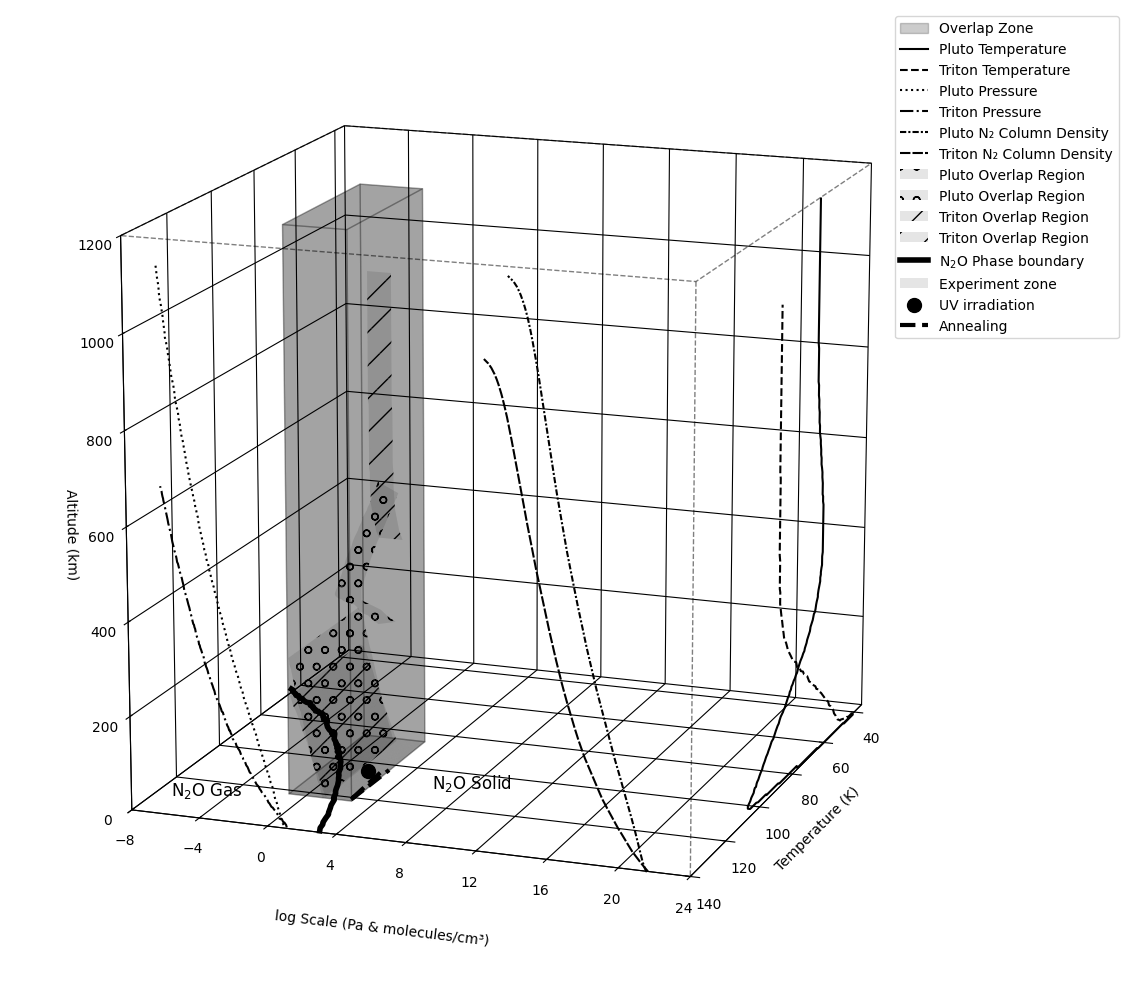

Total Pluto Column Density: 4.57e+22 molecules/cm³
Total Triton Column Density: 3.76e+22 molecules/cm³
Pluto O atoms: 5.76e+19 atoms/cm³
Triton O atoms: 4.73e+19 atoms/cm³


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np
from scipy.interpolate import interp1d

# データ読み込み
pluto_data = pd.read_csv('pluto.csv')
triton_data = pd.read_csv('Triton.csv')
pluto_pressure = pd.read_csv('Pluto_Pressure.csv')
triton_pressure = pd.read_csv('Triton-Pressure.csv')
triton_n2 = pd.read_csv('Triton_N2.csv')
pluto_n2 = pd.read_csv('Pluto_N2.csv')
phase_data = pd.read_csv('N2O_diagram.csv', header=None)
phase_data.columns = ['T', 'P']
phase_data['P'] = phase_data['P'] * 1000  # kPaからPaに変換

# 相図データの温度範囲を調整
phase_data = phase_data[phase_data['T'] <= 140]
phase_data = phase_data[phase_data['T'] >= 0]

# データの取り出し
pluto_temp = pluto_data['40.33898305084746'].values
pluto_alt = pluto_data[' -2.7149321266967945'].values
triton_temp = triton_data['40'].values
triton_alt = triton_data[' -2.708803611738176'].values
pluto_pressure_pa = pluto_pressure['10.270923274392413'].values
pluto_alt_p = pluto_pressure[' 1.4687167233723812'].values
triton_pressure_pa = triton_pressure['14.205996037960368'].values
triton_alt_p = triton_pressure[' 2.0114225355966937'].values

# 3Dプロット作成
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

# 柱密度計算
pluto_density = pluto_n2['1927028532714302.2'].values
pluto_altitude = pluto_n2[' -1.5410655686705468'].values
pluto_column_density = np.zeros_like(pluto_density)
for i in range(len(pluto_density)):
    pluto_column_density[i] = np.trapz(pluto_density[i:], pluto_altitude[i:]) * 1e5

triton_density = triton_n2['3018455797376464.5'].values
triton_altitude = triton_n2[' 0'].values
triton_column_density = np.zeros_like(triton_density)
for i in range(len(triton_density)):
    triton_column_density[i] = np.trapz(triton_density[i:], triton_altitude[i:]) * 1e5

# 重複領域の定義と設定
overlap_vertices = np.array([
    [85, np.log10(5e2), 1200], [122, np.log10(5e2), 1200],
    [122, np.log10(1e-1), 1200], [85, np.log10(1e-1), 1200],
    [85, np.log10(5e2), 0.1], [122, np.log10(5e2), 0.1],
    [122, np.log10(1e-1), 0.1], [85, np.log10(1e-1), 0.1]
])

overlap_faces = [
    [overlap_vertices[0], overlap_vertices[1], overlap_vertices[2], overlap_vertices[3]],
    [overlap_vertices[4], overlap_vertices[5], overlap_vertices[6], overlap_vertices[7]],
    [overlap_vertices[0], overlap_vertices[4], overlap_vertices[7], overlap_vertices[3]],
    [overlap_vertices[1], overlap_vertices[5], overlap_vertices[6], overlap_vertices[2]],
    [overlap_vertices[0], overlap_vertices[1], overlap_vertices[5], overlap_vertices[4]],
    [overlap_vertices[3], overlap_vertices[2], overlap_vertices[6], overlap_vertices[7]]
]

overlap_poly = Poly3DCollection(overlap_faces,
                              facecolor='black',
                              alpha=0.2,
                              edgecolor='black',
                              label='Overlap Zone')
ax.add_collection3d(overlap_poly)

# メインラインのプロット（全て黒色）
ax.plot(pluto_temp, np.ones_like(pluto_temp) * 24, pluto_alt, 
        '-', color='black', label='Pluto Temperature')
ax.plot(triton_temp, np.ones_like(triton_temp) * 24, triton_alt, 
        '--', color='black', label='Triton Temperature')
ax.plot(np.ones_like(pluto_pressure_pa) * 140, np.log10(pluto_pressure_pa), pluto_alt_p, 
        ':', color='black', label='Pluto Pressure')
ax.plot(np.ones_like(triton_pressure_pa) * 140, np.log10(triton_pressure_pa), triton_alt_p, 
        '-.', color='black', label='Triton Pressure')
ax.plot(np.ones_like(pluto_column_density) * 140, np.log10(pluto_column_density), pluto_altitude, 
        linestyle=(0, (3, 1, 1, 1)), color='black', label='Pluto N₂ Column Density')
ax.plot(np.ones_like(triton_column_density) * 140, np.log10(triton_column_density), triton_altitude, 
        linestyle=(0, (5, 1)), color='black', label='Triton N₂ Column Density')

# サーフェス作成と設定
temp_range = np.linspace(0, 140, 100)
alt_range_temp_pluto = np.linspace(min(pluto_alt), max(pluto_alt), len(pluto_temp))
alt_range_temp_triton = np.linspace(min(triton_alt), max(triton_alt), len(triton_temp))

P_temp_pluto, Z_temp_pluto = np.meshgrid(temp_range, alt_range_temp_pluto)
P_temp_triton, Z_temp_triton = np.meshgrid(temp_range, alt_range_temp_triton)

temp_surface_pluto = np.zeros_like(P_temp_pluto)
temp_surface_triton = np.zeros_like(P_temp_triton)

for i in range(len(pluto_temp)):
    temp_surface_pluto[i,:] = pluto_temp[i]
for i in range(len(triton_temp)):
    temp_surface_triton[i,:] = triton_temp[i]

alt_range = np.linspace(min(pluto_alt), max(pluto_alt), len(pluto_pressure_pa))
alt_range_triton = np.linspace(min(triton_alt), max(triton_alt), len(triton_pressure_pa))
T, Z = np.meshgrid(temp_range, alt_range)
T_triton, Z_triton = np.meshgrid(temp_range, alt_range_triton)

pressure_surface_pluto = np.zeros_like(T)
pressure_surface_triton = np.zeros_like(T_triton)

for i in range(len(pluto_pressure_pa)):
    pressure_surface_pluto[i,:] = np.log10(pluto_pressure_pa[i])
for i in range(len(triton_pressure_pa)):
    pressure_surface_triton[i,:] = np.log10(triton_pressure_pa[i])

# 温度面用の重なり条件
temp_overlap_condition_pluto = (temp_surface_pluto >= 85) & (temp_surface_pluto <= 122) & \
                              (P_temp_pluto >= np.log10(1e-1)) & (P_temp_pluto <= np.log10(5e2))
temp_overlap_condition_triton = (temp_surface_triton >= 85) & (temp_surface_triton <= 122) & \
                               (P_temp_triton >= np.log10(1e-1)) & (P_temp_triton <= np.log10(5e2))

# 圧力面用の重なり条件
pressure_overlap_condition_pluto = (T >= 85) & (T <= 122) & \
                                 (pressure_surface_pluto >= np.log10(1e-1)) & \
                                 (pressure_surface_pluto <= np.log10(5e2))
pressure_overlap_condition_triton = (T_triton >= 85) & (T_triton <= 122) & \
                                  (pressure_surface_triton >= np.log10(1e-1)) & \
                                  (pressure_surface_triton <= np.log10(5e2))

# 冥王星の重なり領域 - 丸ドットパターン
surf_temp_pluto = ax.plot_surface(
    np.where(temp_overlap_condition_pluto, temp_surface_pluto, np.nan),
    np.where(temp_overlap_condition_pluto, P_temp_pluto, np.nan),
    np.where(temp_overlap_condition_pluto, Z_temp_pluto, np.nan),
    alpha=0.1, color='black', label='Pluto Overlap Region',
    linestyle=':', hatch='o'
)

surf_pressure_pluto = ax.plot_surface(
    np.where(pressure_overlap_condition_pluto, T, np.nan),
    np.where(pressure_overlap_condition_pluto, pressure_surface_pluto, np.nan),
    np.where(pressure_overlap_condition_pluto, Z, np.nan),
    alpha=0.1, color='black', label='Pluto Overlap Region',
    linestyle=':', hatch='o'
)

# トリトンの重なり領域 - 
surf_temp_triton = ax.plot_surface(
    np.where(temp_overlap_condition_triton, temp_surface_triton, np.nan),
    np.where(temp_overlap_condition_triton, P_temp_triton, np.nan),
    np.where(temp_overlap_condition_triton, Z_temp_triton, np.nan),
    alpha=0.1, color='black', label='Triton Overlap Region',
    linestyle='-.', hatch='/'
)

surf_pressure_triton = ax.plot_surface(
    np.where(pressure_overlap_condition_triton, T_triton, np.nan),
    np.where(pressure_overlap_condition_triton, pressure_surface_triton, np.nan),
    np.where(pressure_overlap_condition_triton, Z_triton, np.nan),
    alpha=0.1, color='black', label='Triton Overlap Region',
    linestyle='-.', hatch='/'
)

# 立方体の枠線設定
top_edges = np.array([
    [35, -8, 1200], [140, -8, 1200], [140, 24, 1200], 
    [35, 24, 1200], [35, -8, 1200]
])
ax.plot(top_edges[:, 0], top_edges[:, 1], top_edges[:, 2],
        'k--', linewidth=1, alpha=0.5)

vertical_edge = np.array([[140, 24, 1200], [140, 24, 0]])
ax.plot(vertical_edge[:, 0], vertical_edge[:, 1], vertical_edge[:, 2],
        'k--', linewidth=1, alpha=0.5)

# 底面に相図を追加
z_bottom = 0

# 相境界線
ax.plot(phase_data['T'], np.log10(phase_data['P']), 
        z_bottom * np.ones_like(phase_data['T']),
        'k-', linewidth=4, label='N$_2$O Phase boundary')

# 実験領域
x_exp = np.linspace(max(0, 85), min(122, 140), 100)
y_exp = np.linspace(np.log10(1e-1), np.log10(5e2), 100)
X_exp, Y_exp = np.meshgrid(x_exp, y_exp)
ax.plot_surface(X_exp, Y_exp, np.zeros_like(X_exp),
                color='black', alpha=0.1, label='Experiment zone')

# UV照射点
ax.scatter(105, np.log10(41), z_bottom, c='black', s=100, label='UV irradiation')

# アニーリング経路
annealing_t = [105, 122, 103]
annealing_p = np.log10([230, 370, 450])
ax.plot(annealing_t, annealing_p, z_bottom * np.ones_like(annealing_t),
        'k--', linewidth=3, label='Annealing')

# 相の表示
ax.text(110, np.log10(1e6), z_bottom, 'N$_2$O Solid', fontsize=12, color='black')
ax.text(130, np.log10(1e-7), z_bottom, 'N$_2$O Gas', fontsize=12, color='black')

# グリッド設定
ax.grid(True)
ax.xaxis._axinfo["grid"].update({"linestyle": "-", "color": "black", "alpha": 0.3})
ax.yaxis._axinfo["grid"].update({"linestyle": "-", "color": "black", "alpha": 0.3})
ax.zaxis._axinfo["grid"].update({"linestyle": "-", "color": "black", "alpha": 0.3})

# 軸設定
ax.set_xticks(np.arange(0, 141, 20))
ax.set_yticks([-8, -4, 0, 4, 8, 12, 16, 20, 24])
ax.set_zticks(np.arange(0, 1201, 200))
ax.set_ylabel('log Scale (Pa & molecules/cm³)', rotation=270, labelpad=20)
ax.set_xlabel('Temperature (K)')
ax.set_zlabel('Altitude (km)')
ax.legend(bbox_to_anchor=(1.15, 1), loc='upper right')
ax.view_init(elev=15, azim=20)

# 背面パネル設定
ax.xaxis.set_pane_color((1, 1, 1, 0))
ax.yaxis.set_pane_color((1, 1, 1, 0))
ax.zaxis.set_pane_color((1, 1, 1, 0))

# グラフ範囲設定
ax.set_xlim(35, 140)
ax.set_ylim(-8, 24)
ax.set_zlim(0, 1200)
ax.set_box_aspect([1, 1, 1])

plt.tight_layout()
plt.show()

# 結果出力
total_pluto_column_density = np.sum(pluto_column_density)
total_triton_column_density = np.sum(triton_column_density)
o_pluto = total_pluto_column_density * 0.00126
o_triton = total_triton_column_density * 0.00126

print(f"Total Pluto Column Density: {total_pluto_column_density:.2e} molecules/cm³")
print(f"Total Triton Column Density: {total_triton_column_density:.2e} molecules/cm³")
print(f"Pluto O atoms: {o_pluto:.2e} atoms/cm³")
print(f"Triton O atoms: {o_triton:.2e} atoms/cm³")




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np
from scipy.interpolate import interp1d

# データ読み込み
pluto_data = pd.read_csv('pluto.csv')
triton_data = pd.read_csv('Triton.csv')
pluto_pressure = pd.read_csv('Pluto_Pressure.csv')
triton_pressure = pd.read_csv('Triton-Pressure.csv')
triton_n2 = pd.read_csv('Triton_N2.csv')
pluto_n2 = pd.read_csv('Pluto_N2.csv')
phase_data = pd.read_csv('N2O_diagram.csv', header=None)
phase_data.columns = ['T', 'P']
phase_data['P'] = phase_data['P'] * 1000  # kPaからPaに変換

# 相図データの温度範囲を調整
phase_data = phase_data[phase_data['T'] <= 140]
phase_data = phase_data[phase_data['T'] >= 0]

# データの取り出し
pluto_temp = pluto_data['40.33898305084746'].values
pluto_alt = pluto_data[' -2.7149321266967945'].values
triton_temp = triton_data['40'].values
triton_alt = triton_data[' -2.708803611738176'].values
pluto_pressure_pa = pluto_pressure['10.270923274392413'].values
pluto_alt_p = pluto_pressure[' 1.4687167233723812'].values
triton_pressure_pa = triton_pressure['14.205996037960368'].values
triton_alt_p = triton_pressure[' 2.0114225355966937'].values

# 3Dプロット作成
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

# 柱密度計算
pluto_density = pluto_n2['1927028532714302.2'].values
pluto_altitude = pluto_n2[' -1.5410655686705468'].values
pluto_column_density = np.zeros_like(pluto_density)
for i in range(len(pluto_density)):
    pluto_column_density[i] = np.trapz(pluto_density[i:], pluto_altitude[i:]) * 1e5

triton_density = triton_n2['3018455797376464.5'].values
triton_altitude = triton_n2[' 0'].values
triton_column_density = np.zeros_like(triton_density)
for i in range(len(triton_density)):
    triton_column_density[i] = np.trapz(triton_density[i:], triton_altitude[i:]) * 1e5

# 重複領域の定義と設定
overlap_vertices = np.array([
    [85, np.log10(5e2), 1200], [122, np.log10(5e2), 1200],
    [122, np.log10(1e-1), 1200], [85, np.log10(1e-1), 1200],
    [85, np.log10(5e2), 0.1], [122, np.log10(5e2), 0.1],
    [122, np.log10(1e-1), 0.1], [85, np.log10(1e-1), 0.1]
])

overlap_faces = [
    [overlap_vertices[0], overlap_vertices[1], overlap_vertices[2], overlap_vertices[3]],
    [overlap_vertices[4], overlap_vertices[5], overlap_vertices[6], overlap_vertices[7]],
    [overlap_vertices[0], overlap_vertices[4], overlap_vertices[7], overlap_vertices[3]],
    [overlap_vertices[1], overlap_vertices[5], overlap_vertices[6], overlap_vertices[2]],
    [overlap_vertices[0], overlap_vertices[1], overlap_vertices[5], overlap_vertices[4]],
    [overlap_vertices[3], overlap_vertices[2], overlap_vertices[6], overlap_vertices[7]]
]

overlap_poly = Poly3DCollection(overlap_faces,
                              facecolor='purple',
                              alpha=0.2,
                              edgecolor='purple',
                              label='Overlap Zone')
ax.add_collection3d(overlap_poly)

# 色の定義
pluto_color = 'blue'
triton_color = 'red'
phase_color = 'green'
experiment_color = 'orange'

# メインラインのプロット（色分け）
ax.plot(pluto_temp, np.ones_like(pluto_temp) * 24, pluto_alt, 
        '-', color=pluto_color, linewidth=2, label='Pluto Temperature')
ax.plot(triton_temp, np.ones_like(triton_temp) * 24, triton_alt, 
        '--', color=triton_color, linewidth=2, label='Triton Temperature')
ax.plot(np.ones_like(pluto_pressure_pa) * 140, np.log10(pluto_pressure_pa), pluto_alt_p, 
        ':', color=pluto_color, linewidth=2, label='Pluto Pressure')
ax.plot(np.ones_like(triton_pressure_pa) * 140, np.log10(triton_pressure_pa), triton_alt_p, 
        '-.', color=triton_color, linewidth=2, label='Triton Pressure')
ax.plot(np.ones_like(pluto_column_density) * 140, np.log10(pluto_column_density), pluto_altitude, 
        linestyle=(0, (3, 1, 1, 1)), color=pluto_color, linewidth=2, label='Pluto N₂ Density')
ax.plot(np.ones_like(triton_column_density) * 140, np.log10(triton_column_density), triton_altitude, 
        linestyle=(0, (5, 1)), color=triton_color, linewidth=2, label='Triton N₂ Density')

# サーフェス作成と設定
temp_range = np.linspace(0, 140, 100)
alt_range_temp_pluto = np.linspace(min(pluto_alt), max(pluto_alt), len(pluto_temp))
alt_range_temp_triton = np.linspace(min(triton_alt), max(triton_alt), len(triton_temp))

P_temp_pluto, Z_temp_pluto = np.meshgrid(temp_range, alt_range_temp_pluto)
P_temp_triton, Z_temp_triton = np.meshgrid(temp_range, alt_range_temp_triton)

temp_surface_pluto = np.zeros_like(P_temp_pluto)
temp_surface_triton = np.zeros_like(P_temp_triton)

for i in range(len(pluto_temp)):
    temp_surface_pluto[i,:] = pluto_temp[i]
for i in range(len(triton_temp)):
    temp_surface_triton[i,:] = triton_temp[i]

alt_range = np.linspace(min(pluto_alt), max(pluto_alt), len(pluto_pressure_pa))
alt_range_triton = np.linspace(min(triton_alt), max(triton_alt), len(triton_pressure_pa))
T, Z = np.meshgrid(temp_range, alt_range)
T_triton, Z_triton = np.meshgrid(temp_range, alt_range_triton)

pressure_surface_pluto = np.zeros_like(T)
pressure_surface_triton = np.zeros_like(T_triton)

for i in range(len(pluto_pressure_pa)):
    pressure_surface_pluto[i,:] = np.log10(pluto_pressure_pa[i])
for i in range(len(triton_pressure_pa)):
    pressure_surface_triton[i,:] = np.log10(triton_pressure_pa[i])

# 温度面用の重なり条件
temp_overlap_condition_pluto = (temp_surface_pluto >= 85) & (temp_surface_pluto <= 122) & \
                              (P_temp_pluto >= np.log10(1e-1)) & (P_temp_pluto <= np.log10(5e2))
temp_overlap_condition_triton = (temp_surface_triton >= 85) & (temp_surface_triton <= 122) & \
                               (P_temp_triton >= np.log10(1e-1)) & (P_temp_triton <= np.log10(5e2))

# 圧力面用の重なり条件
pressure_overlap_condition_pluto = (T >= 85) & (T <= 122) & \
                                 (pressure_surface_pluto >= np.log10(1e-1)) & \
                                 (pressure_surface_pluto <= np.log10(5e2))
pressure_overlap_condition_triton = (T_triton >= 85) & (T_triton <= 122) & \
                                  (pressure_surface_triton >= np.log10(1e-1)) & \
                                  (pressure_surface_triton <= np.log10(5e2))

# 冥王星の重なり領域 - 色付き
surf_temp_pluto = ax.plot_surface(
    np.where(temp_overlap_condition_pluto, temp_surface_pluto, np.nan),
    np.where(temp_overlap_condition_pluto, P_temp_pluto, np.nan),
    np.where(temp_overlap_condition_pluto, Z_temp_pluto, np.nan),
    alpha=0.2, color=pluto_color, label='Pluto Overlap Region',
    linestyle=':', hatch='o'
)

surf_pressure_pluto = ax.plot_surface(
    np.where(pressure_overlap_condition_pluto, T, np.nan),
    np.where(pressure_overlap_condition_pluto, pressure_surface_pluto, np.nan),
    np.where(pressure_overlap_condition_pluto, Z, np.nan),
    alpha=0.2, color=pluto_color, label='Pluto Overlap Region',
    linestyle=':', hatch='o'
)

# トリトンの重なり領域 - 色付き
surf_temp_triton = ax.plot_surface(
    np.where(temp_overlap_condition_triton, temp_surface_triton, np.nan),
    np.where(temp_overlap_condition_triton, P_temp_triton, np.nan),
    np.where(temp_overlap_condition_triton, Z_temp_triton, np.nan),
    alpha=0.2, color=triton_color, label='Triton Overlap Region',
    linestyle='-.', hatch='/'
)

surf_pressure_triton = ax.plot_surface(
    np.where(pressure_overlap_condition_triton, T_triton, np.nan),
    np.where(pressure_overlap_condition_triton, pressure_surface_triton, np.nan),
    np.where(pressure_overlap_condition_triton, Z_triton, np.nan),
    alpha=0.2, color=triton_color, label='Triton Overlap Region',
    linestyle='-.', hatch='/'
)

# 立方体の枠線設定
top_edges = np.array([
    [35, -8, 1200], [140, -8, 1200], [140, 24, 1200], 
    [35, 24, 1200], [35, -8, 1200]
])
ax.plot(top_edges[:, 0], top_edges[:, 1], top_edges[:, 2],
        'k--', linewidth=1, alpha=0.5)

vertical_edge = np.array([[140, 24, 1200], [140, 24, 0]])
ax.plot(vertical_edge[:, 0], vertical_edge[:, 1], vertical_edge[:, 2],
        'k--', linewidth=1, alpha=0.5)

# 底面に相図を追加
z_bottom = 0

# 相境界線
ax.plot(phase_data['T'], np.log10(phase_data['P']), 
        z_bottom * np.ones_like(phase_data['T']),
        color=phase_color, linewidth=4, label='N$_2$O Phase boundary')

# 実験領域
x_exp = np.linspace(max(0, 85), min(122, 140), 100)
y_exp = np.linspace(np.log10(1e-1), np.log10(5e2), 100)
X_exp, Y_exp = np.meshgrid(x_exp, y_exp)
ax.plot_surface(X_exp, Y_exp, np.zeros_like(X_exp),
                color=experiment_color, alpha=0.3, label='Experiment zone')

# UV照射点
ax.scatter(105, np.log10(41), z_bottom, c='black', s=150, label='UV irradiation')

# アニーリング経路
annealing_t = [105, 122, 103]
annealing_p = np.log10([230, 370, 450])
ax.plot(annealing_t, annealing_p, z_bottom * np.ones_like(annealing_t),
        color='magenta', linewidth=3, label='Annealing')

# 相の表示 - フォントサイズ拡大
ax.text(110, np.log10(1e6), z_bottom, 'N$_2$O Solid', fontsize=16, color='black')
ax.text(130, np.log10(1e-7), z_bottom, 'N$_2$O Gas', fontsize=16, color='black')

# グリッド設定
ax.grid(True)
ax.xaxis._axinfo["grid"].update({"linestyle": "-", "color": "black", "alpha": 0.3})
ax.yaxis._axinfo["grid"].update({"linestyle": "-", "color": "black", "alpha": 0.3})
ax.zaxis._axinfo["grid"].update({"linestyle": "-", "color": "black", "alpha": 0.3})

# 軸設定 - フォントサイズ拡大
ax.set_xticks(np.arange(0, 141, 20))
ax.set_yticks([-8, -4, 0, 4, 8, 12, 16, 20, 24])
ax.set_zticks(np.arange(0, 1201, 200))
ax.set_ylabel('log Scale (Pressure Pa & Density molecules/cm³)', rotation=270, labelpad=25, fontsize=14)
ax.set_xlabel('Temperature (K)', fontsize=14)
ax.set_zlabel('Altitude (km)', fontsize=14)

# 目盛りのフォントサイズを大きく
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.tick_params(axis='z', labelsize=12)

# 凡例の設定 - 位置を下げて大きく
ax.legend(bbox_to_anchor=(0.5, -0.05), loc='upper center', fontsize=14, ncol=3)
ax.view_init(elev=15, azim=20)

# 背面パネル設定
ax.xaxis.set_pane_color((1, 1, 1, 0))
ax.yaxis.set_pane_color((1, 1, 1, 0))
ax.zaxis.set_pane_color((1, 1, 1, 0))

# グラフ範囲設定
ax.set_xlim(35, 140)
ax.set_ylim(-8, 24)
ax.set_zlim(0, 1200)
ax.set_box_aspect([1, 1, 1])

plt.tight_layout()
plt.subplots_adjust(bottom=0.2)  # 凡例のためにグラフ下部に余白を追加
plt.show()

# 結果出力
total_pluto_column_density = np.sum(pluto_column_density)
total_triton_column_density = np.sum(triton_column_density)
o_pluto = total_pluto_column_density * 0.00126
o_triton = total_triton_column_density * 0.00126

print(f"Total Pluto Density: {total_pluto_column_density:.2e} molecules/cm³")
print(f"Total Triton Density: {total_triton_column_density:.2e} molecules/cm³")
print(f"Pluto O atoms: {o_pluto:.2e} atoms/cm³")
print(f"Triton O atoms: {o_triton:.2e} atoms/cm³")
